# Adv. Data Mining
### Ryan Durfey
## Problem Set 3: Part 3
### Chapter 4
#### Exercises 12 and 13

####12a

In [1]:
def Power():
    print 2**3
Power()

8


####12b

In [3]:
def Power2(x,a):
    print x**a
Power2(3,8)

6561


#### 12c

In [5]:
Power2(10,3)
Power2(8,17)
Power2(131,3)

1000
2251799813685248
2248091


####12d

In [62]:
def Power3(x,a):
    return x**a
object = Power3(3,3)
object

27

####12e

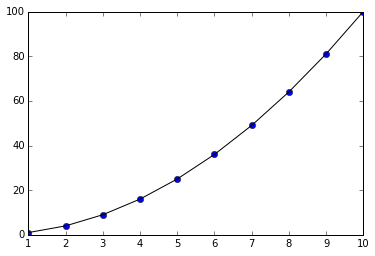

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# must redefine the function because python can't handle lists/vectors easily
def Power3(x,a):
    return np.power(x,a)

x = [1,2,3,4,5,6,7,8,9,10]
plt.plot(x,Power3(x,2),'bo',x,Power3(x,2),'k')

## note: my apologies for the basic, non-pretty plot. i'm still learning python and its plotting features & i can't get seaborn to install/import on my machine.

####12f

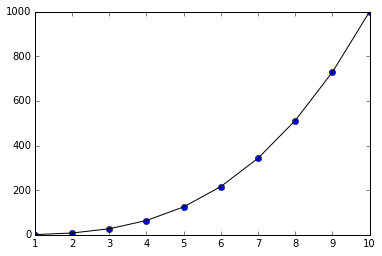

In [71]:
## Our new Power3 function can already take in ranges of values, so we can simply call it within the new wrapper function, PlotPower
def PlotPower(x,a):
    plt.plot(x,Power3(x,a),'bo',x,Power3(x,a),'k')

## example
PlotPower(range(1,11),3)
    

####13

In [182]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

Boston = pd.read_csv("./Boston.csv")
Boston.keys()

## loop through 'crim' and create a binary list corresponding to if the value is above or below the median
y = []
for i in Boston.crim:
    if i > np.median(Boston.crim):
        y.append(1)
    else:
        y.append(0)

Boston2 = Boston.drop(['crim'],axis=1,inplace=False)  ## drop original 'crim'
Boston2.insert(loc=0,column='crim',value=y)  ## attach new binary variable as 'crim'
Boston2['chas'] = Boston2['chas'].astype('category')  ## convert 'chas' variable to a factor
#print Boston2['chas'].describe()

## logistic regression model using statsmodels
formula = 'crim ~ zn + chas + indus + nox + rm + age + dis + rad + tax \
+ ptratio + black + lstat + medv'

log_mod = smf.glm(formula=formula,data=Boston2,family=sm.families.Binomial()).fit()
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   crim   No. Observations:                  506
Model:                            GLM   Df Residuals:                      492
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -105.96
Date:                Wed, 22 Apr 2015   Deviance:                       211.93
Time:                        16:32:27   Pearson chi2:                     556.
No. Iterations:                    11                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -34.1037      6.530     -5.223      0.000       -46.902   -21.305
zn            -0.0799      0.034     -2.369      0.018        -0.146    -0.014
chas           0.7853      0.729      1.077      0.281        -0.643     2.214
indus         -0.0594      0.044     -1.358      0.174        -0.145     0.026
nox           48.5238      7.397      6.560      0.000        34.027    63.021
rm            -0.4256      0.701     -0.607      0.544        -1.800     0.949
age            0.0222      0.012      1.814      0.070        -0.002     0.046
dis            0.6914      0.218      3.167      0.002         0.264     1.119
rad            0.6565      0.152      4.306      0.000         0.358     0.955
tax           -0.0064      0.003     -2.385      0.017        -0.012    -0.001
ptratio        0.3687      0.122      3.019      0.003         0.129     0.608
black         -0.0135      0.007     -2.069      0.039        -0.026    -0.001
lstat          0.0439      0.049      0.895      0.371        -0.052     0.140
medv           0.1671      0.067      2.497      0.013         0.036     0.298
==============================================================================
"""

From the above summary, we see that some of the predictors are significant and some are not. Let's remove the ones that aren't and recreate our model.

In [179]:
## logistic regression model using statsmodels
formula2 = 'crim ~ zn + nox +  + dis + rad + tax + ptratio + black + medv'

log_mod2 = smf.glm(formula=formula2,data=Boston2,family=sm.families.Binomial()).fit()
log_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   crim   No. Observations:                  506
Model:                            GLM   Df Residuals:                      497
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -110.89
Date:                Wed, 22 Apr 2015   Deviance:                       221.78
Time:                        16:19:00   Pearson chi2:                     385.
No. Iterations:                    11                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -28.3477      5.570     -5.089      0.000       -39.264   -17.431
zn            -0.0745      0.030     -2.485      0.013        -0.133    -0.016
nox           44.1804      6.290      7.024      0.000        31.853    56.508
dis            0.4898      0.195      2.513      0.012         0.108     0.872
rad            0.6921      0.138      5.021      0.000         0.422     0.962
tax           -0.0074      0.002     -3.067      0.002        -0.012    -0.003
ptratio        0.2721      0.107      2.536      0.011         0.062     0.482
black         -0.0135      0.006     -2.130      0.033        -0.026    -0.001
medv           0.0879      0.031      2.856      0.004         0.028     0.148
==============================================================================
"""

Now let's try to use this model to predict the values and see how success it is. For posterity, we can compare this to the first, full model that was created previously as well.

In [184]:
## get predicted values from reduced (2nd) model
predicted = log_mod2.predict()
threshold = 0.5
predicted = (predicted > threshold).astype(int)
predicted

print pd.crosstab(Boston2.crim,predicted,rownames=['Actual'],colnames=['Predicted'])
print "Accuracy Score for reduced model: %s" % accuracy_score(Boston2.crim,predicted)

Predicted    0    1
Actual             
0          229   24
1           30  223
Accuracy Score for reduced model: 0.893280632411


In [185]:
## get predicted values from 1st, full model
predicted_full = log_mod.predict()
threshold = 0.5
predicted_full = (predicted_full > threshold).astype(int)
predicted_full

print pd.crosstab(Boston2.crim,predicted_full,rownames=['Actual'],colnames=['Predicted'])
print "Accuracy Score for full model: %s" % accuracy_score(Boston2.crim,predicted_full)

Predicted    0    1
Actual             
0          234   19
1           24  229
Accuracy Score for full model: 0.915019762846


So, as it turns out, our full model looks to have a slightly higher accuracy score than the pared down one. Although, both have a decent enough accuracy score (and therefore fairly low error rate). 

However, we need to keep in mind that this is only calculated for the data that the model was trained on! Therefore, it makes sense that the more complex model does better. To more thoroughly understand which model is better, we need to do holdout testing. We would subset training and test datasets, create the model using the training set, then test its prediction accuracy with the test set. With this method, we are better equipped to avoid overfitting and understand the bias-variance trade-off with model complexity.